In [ ]:

import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download /content/kaggle.json

Invalid dataset specification /content/kaggle.json


In [ ]:
!unzip /content/kaggle.json

Archive:  /content/kaggle.json
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg  
  inflating: Dataset/Biodegradable Images/TRAIN.1_BIODEG_ORI_10035.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10025.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10043.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_OR

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to the dataset
dataset_dir = '/content/Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)

    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)
    # 0.25 × 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")


Trash Images 130
Biodegradable Images 130
Recyclable Images 130
Dataset split into training, validation, and test sets.


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


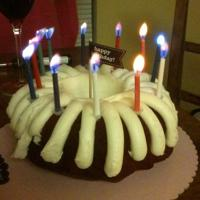

In [ ]:
import random
from IPython.display import Image, display
import os

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Biodegradable Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

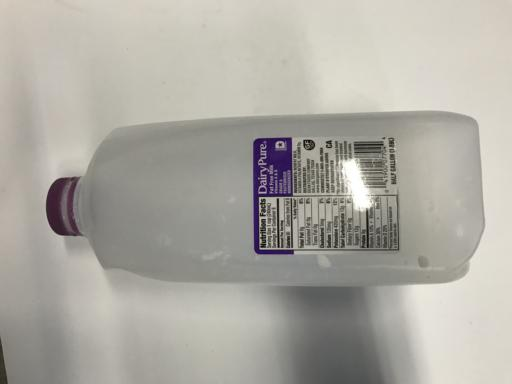

In [ ]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Recyclable Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

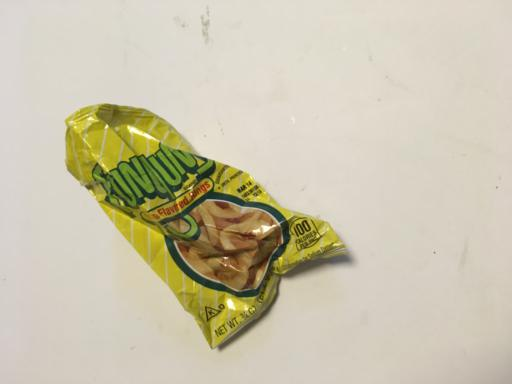

In [ ]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Trash Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

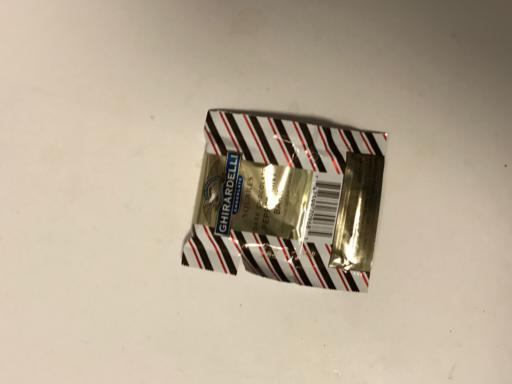

In [ ]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Trash Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=20
)

test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=20
)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [ ]:
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=20)


Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG16 model without the top classification layer
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# Optional: print layers (debug step)
for layer in vgg.layers:
    print(layer)

# Freeze all layers in the VGG16 base
for layer in vgg.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(vgg.output)
output = Dense(3, activation='softmax')(x)  # Adjust '3' if you have a different number of classes

# Create the final model
vgg16 = Model(inputs=vgg.input, outputs=output)

# Show model architecture
vgg16.summary()

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping callback
history = vgg16.fit(train, validation_data=test,
                    epochs=10,
                    steps_per_epoch=5,
                    callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 144s 32s/step - accuracy: 0.3554 - loss: 1.1693 - val_accuracy: 0.4744 - val_loss: 0.9749
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 144s 33s/step - accuracy: 0.4462 - loss: 1.0001 - val_accuracy: 0.6410 - val_loss: 0.8461
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 15s/step - accuracy: 0.5100 - loss: 0.8908 - val_accuracy: 0.6923 - val_loss: 0.7966
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 134s 24s/step - accuracy: 0.6919 - loss: 0.7777 - val_accuracy: 0.7564 - val_loss: 0.7036
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 106s 24s/step - accuracy: 0.7700 - loss: 0.6264 - val_accuracy: 0.7692 - val_loss: 0.6548
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 15s/step - accuracy: 0.6400 - loss: 0.6932 - val_accuracy: 0.7692 - val_loss: 0.6343
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 110s 24s/step - accuracy: 0.8297 - loss: 0.5429 - val_accuracy: 0.7436 - val_loss: 0.6103
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 105s 23s/step - accuracy: 0.8253 - loss: 0.5346 - val_accuracy: 0.7436 - val_loss: 0